In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Naive-Bayes-Classification-Data.csv to Naive-Bayes-Classification-Data.csv


In [4]:
csv_path = "Naive-Bayes-Classification-Data.csv"
df = pd.read_csv(csv_path)

# Inspect dataset
display(df.head())
display(df.describe())
print(df.info())

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB
None


In [5]:
# Step 3 — Split features and target
X = df[['glucose', 'bloodpressure']]
y = df['diabetes']

# Stratified split so both classes are balanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((796, 2), (199, 2))

✅ Accuracy: 0.9095477386934674

📊 Classification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        99
           1       0.91      0.91      0.91       100

    accuracy                           0.91       199
   macro avg       0.91      0.91      0.91       199
weighted avg       0.91      0.91      0.91       199



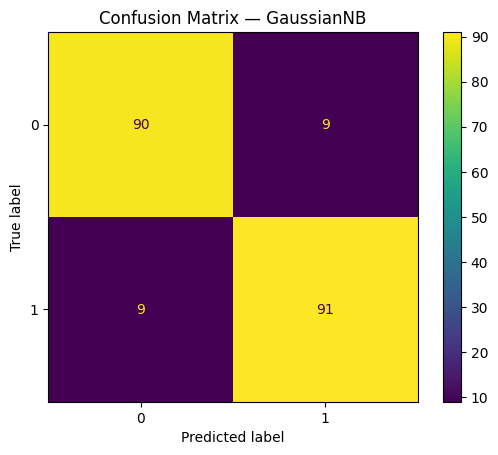

In [6]:
# Step 4 — Train GaussianNB and Evaluate
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix — GaussianNB")
plt.show()


In [7]:
# Step 5 — Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(GaussianNB(), X, y, cv=cv, scoring="accuracy")

print("CV Accuracy (5 folds):", scores)
print("Mean:", scores.mean(), "±", scores.std())


CV Accuracy (5 folds): [0.94974874 0.91959799 0.92964824 0.91959799 0.93467337]
Mean: 0.9306532663316582 ± 0.011191486156442264


In [8]:
# Step 6 — Save trained model
joblib.dump(gnb, "gaussian_nb_diabetes.joblib")
print("Model saved as gaussian_nb_diabetes.joblib")


Model saved as gaussian_nb_diabetes.joblib


In [12]:
# User input prediction (with column names to avoid warning)
glucose = float(input("Enter Glucose level: "))
bloodpressure = float(input("Enter Blood Pressure: "))

# Create DataFrame with correct feature names
user_data = pd.DataFrame([[glucose, bloodpressure]], columns=['glucose', 'bloodpressure'])

# Predict
prediction = gnb.predict(user_data)[0]

if prediction == 1:
    print("🩸 Based on Naive Bayes prediction → You may have Diabetes (Positive).")
else:
    print("✅ Based on Naive Bayes prediction → You do NOT have Diabetes (Negative).")

proba = gnb.predict_proba(user_data)[0]
print(f"Probability of No Diabetes: {proba[0]*100:.2f}%")
print(f"Probability of Diabetes: {proba[1]*100:.2f}%")


Enter Glucose level: 40
Enter Blood Pressure: 80
✅ Based on Naive Bayes prediction → You do NOT have Diabetes (Negative).
Probability of No Diabetes: 61.64%
Probability of Diabetes: 38.36%
